# Basic 🧠
CAUTION ⚠️: Read [this example notebook](https://github.com/codingfisch/niftiview/blob/main/examples/0_core.ipynb) first, if you want to learn about `layout` and `origin`!

`NiftiImage` loads a volumetric image and offers a `.get_image` method

In [1]:
from niftiview import NiftiImage, ATLASES, TEMPLATES

template_filepath = TEMPLATES['ch2']  # 'ch2', 'T1' or 'mni152'
nii = NiftiImage(template_filepath)
im = nii.get_image(origin=[0, 0, 0], layout='sagittal++', height=400)
print(type(im))

<class 'PIL.Image.Image'>


`.get_image` returns a `PIL` Image with a `height` of 400. Let's show it!

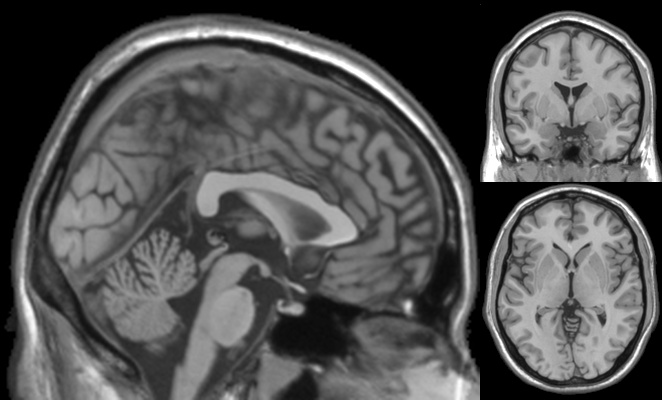

In [2]:
im  # in .py script use im.show() instead

## Save image 💾
### Bitmap
One can simply use the `save` method of the `PIL` Image to save it as a bitmap

In [3]:
im.save('brain.png')  # PNG, JPEG or TIFF

### Vector graphic
To output proper vector graphics - PDF, SVG, EPS or PS - the `.save_image` method of `NiftiImage` can be used

In [4]:
nii.save_image('brain.pdf', origin=[0, 0, 0], height=400, layout='sagittal++')

This enables lines and texts being (publication-ready) sharp, independent of the image resolution!

Also, it makes it easy to edit the image afterward, with e.g. [Inkscape](https://inkscape.org/)!

## Overlays 📑

A `crosshair` can be laid over to indicate the origin

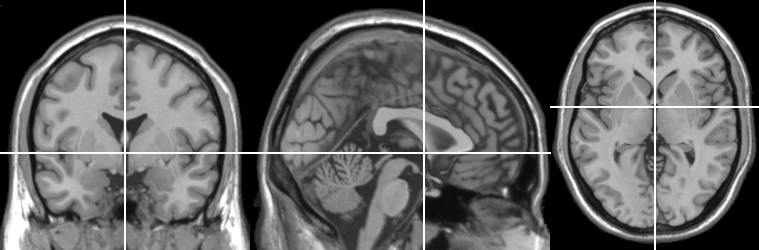

In [5]:
nii.get_image(height=250, crosshair=True)

Likewise, the six arguments `fpath`,  `coordinates`,  `header`,  `histogram`,  `title` and `cbar` add different overlays

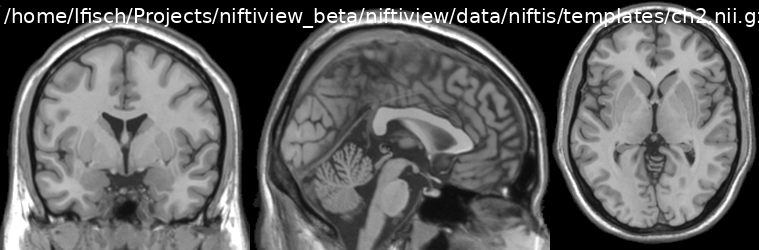

In [6]:
nii.get_image(height=250, fpath=True)  # instead of True, use integer (e.g. 1) to prune filepath

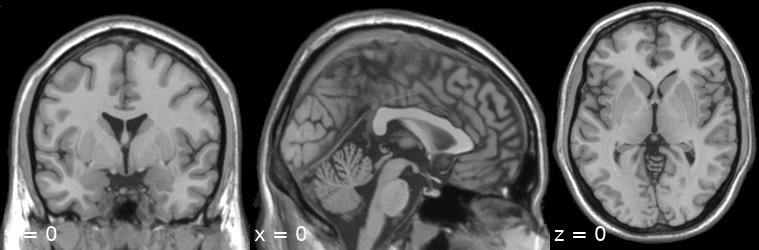

In [7]:
nii.get_image(height=250, coordinates=True)

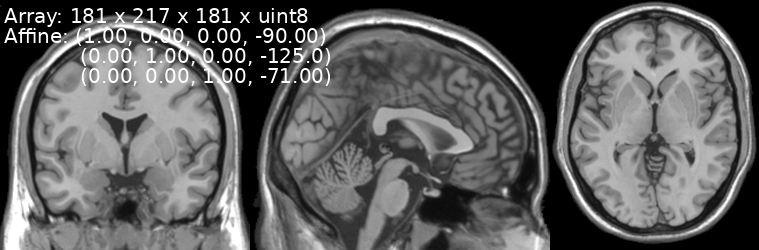

In [8]:
nii.get_image(height=250, header=True)

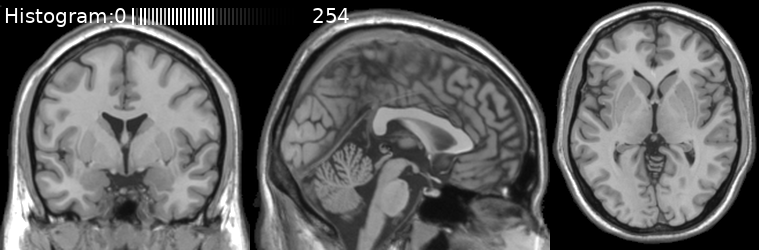

In [9]:
nii.get_image(height=250, histogram=True)

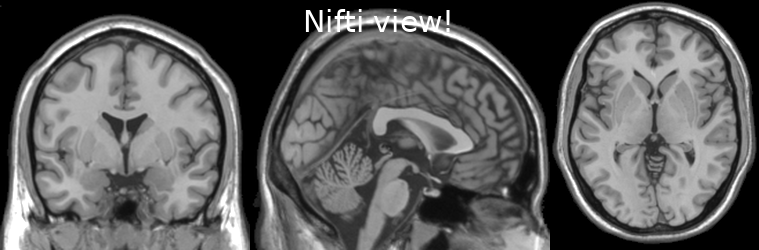

In [10]:
nii.get_image(height=250, title='Nifti view!')

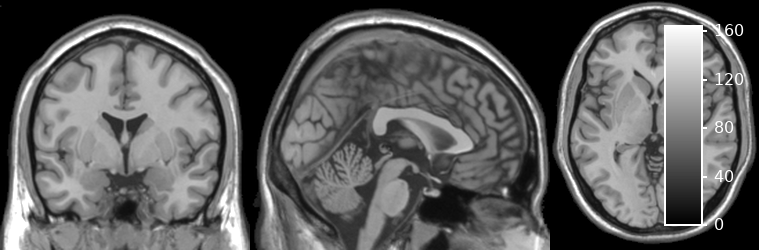

In [11]:
nii.get_image(height=250, cbar=True)

Let's make the lines and font unreasonably large, to show that we can

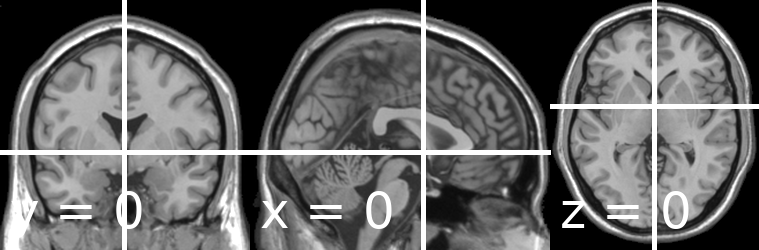

In [12]:
nii.get_image(height=250, crosshair=True, coordinates=True, linewidth=5, fontsize=50)

## Masks 🎨
A list of two filepaths can be passed to `NiftiImage` to add a mask (e.g. of an atlas) as an image layer...


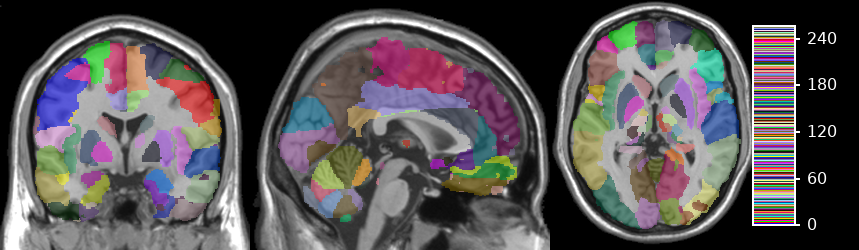

In [13]:
atlas = 'aal3'  # pick between e.g. 'aal3', 'mori' and 'suit'
atlas_filepath = ATLASES[atlas]
nii = NiftiImage([template_filepath, atlas_filepath])  # list of filepaths
nii.get_image(height=250, is_atlas=[False, True],
              cbar=True, cbar_pad=100)

...and `is_atlas=(False, True)` sets the argument for each corresponding image layer.

`is_atlas` enforces proper color mapping of values for atlases: 1 -> 1. color of colormap, 2 -> 2. color of colormap...

If we set it to `False` via...

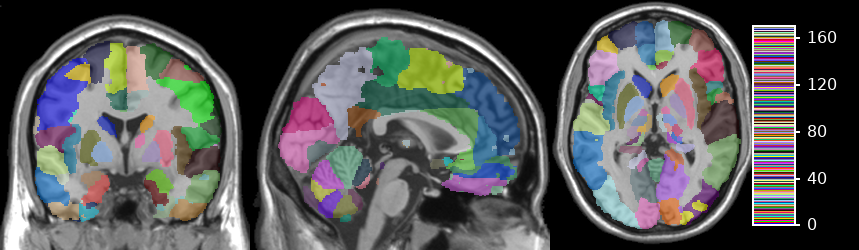

In [14]:
nii.get_image(height=250, is_atlas=[False, False],
              cbar=True, cbar_pad=100)

...the values are normalized to the full colormap range: 1 -> 1. color of colormap,..., 170 (max. value of aal3) -> last color of colormap

Beside `is_atlas`, the following arguments also act on image layers:

`cmap` defines the [colormap (pick one of >200)](https://cmap-docs.readthedocs.io/en/latest/catalog/) used for the image layer

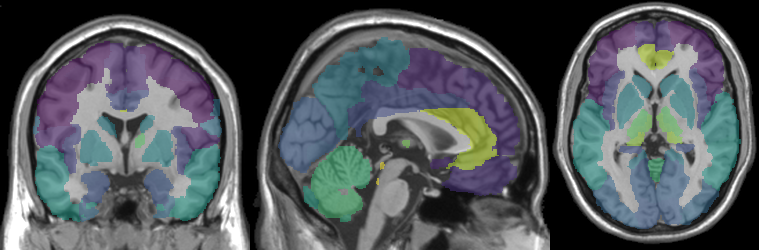

In [15]:
nii.get_image(height=250, cmap=['gray', 'viridis'])  # default ['gray', 'glasbey']

`transp_if` (e.g. `<90`) makes parts of the image layer transparent based on their value

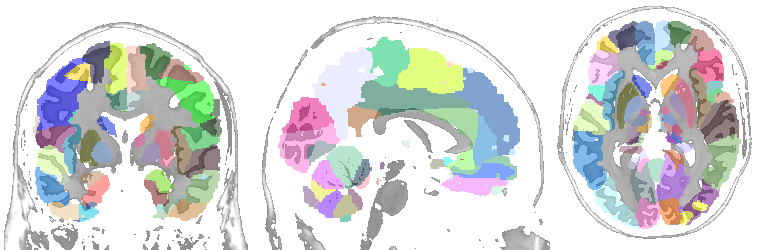

In [16]:
nii.get_image(height=250, transp_if=['<90', '=0'])  # default [None, '=0']

`vrange` (e.g. `(0, 40)`) sets the value range of the colormap (values outside are clipped), while alternatively...

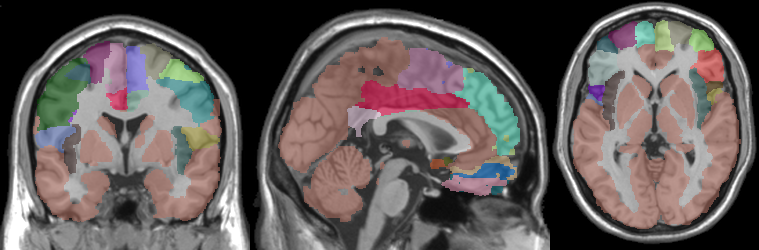

In [17]:
nii.get_image(height=250, vrange=(None, (0, 40)))  # default (None, None)

...`qrange` uses quantiles to set the value range of the colormap (again, values outside are clipped)

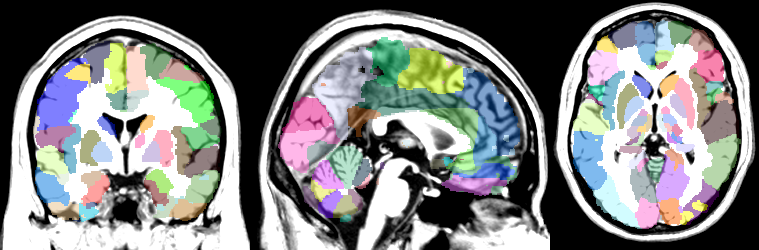

In [18]:
nii.get_image(height=250, qrange=((.5, .7), (.0, 1.)))  # default ((.5, .99), (.0, 1.))

`resizing` defines what [resampling](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Resampling) is used to resize the respective image layer

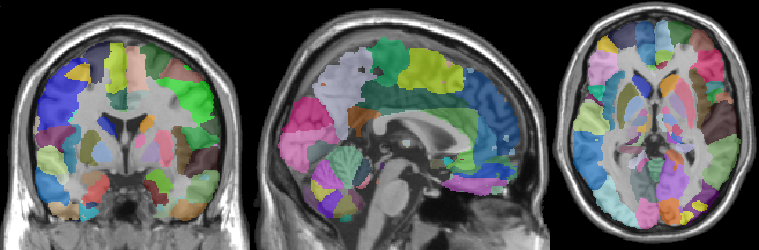

In [19]:
nii.get_image(height=250, resizing=(0, 0))  # default (1, 0)

Finally, via `alpha` the opacity of the mask layer(s) can be controlled

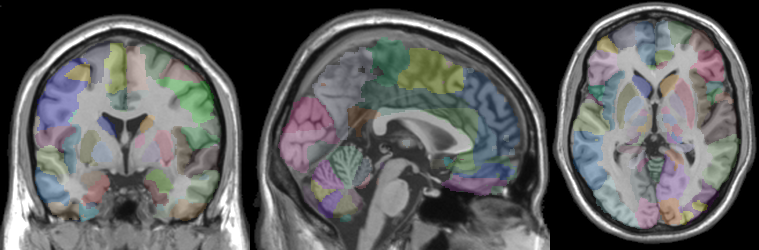

In [20]:
nii.get_image(height=250, alpha=.2)  # default .5

# Advanced 🧠🧠

## Custom Colorbar 🎨
Scroll through the self-explanatory examples to understand colorbar customization!

In [21]:
nii = NiftiImage(template_filepath)

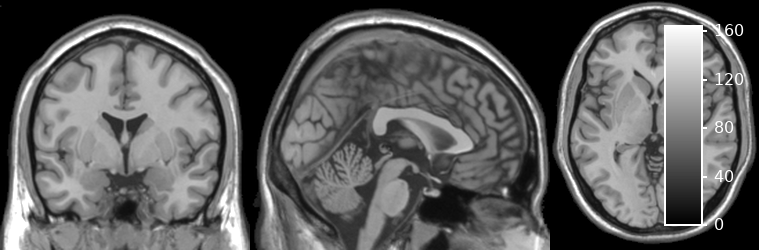

In [22]:
nii.get_image(height=250, cbar=True)

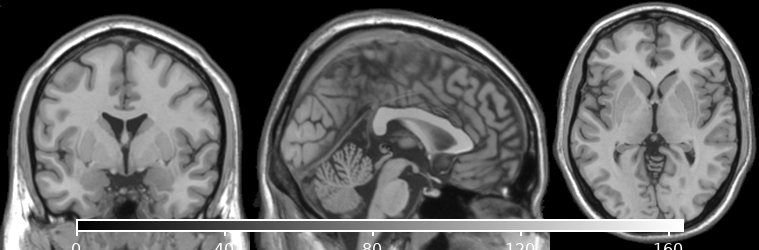

In [23]:
nii.get_image(height=250, cbar=True, cbar_vertical=False)  # default: True

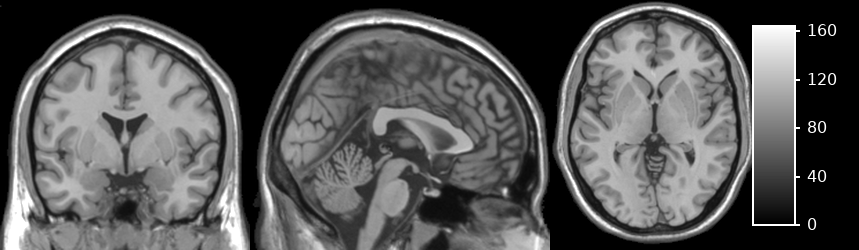

In [24]:
nii.get_image(height=250, cbar=True, cbar_pad=100)  # default: 0

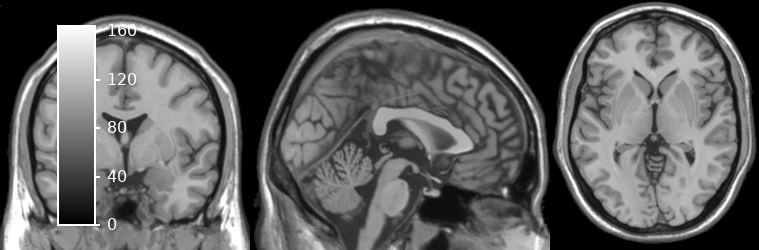

In [25]:
nii.get_image(height=250, cbar=True, cbar_x=.1)  # default: .9

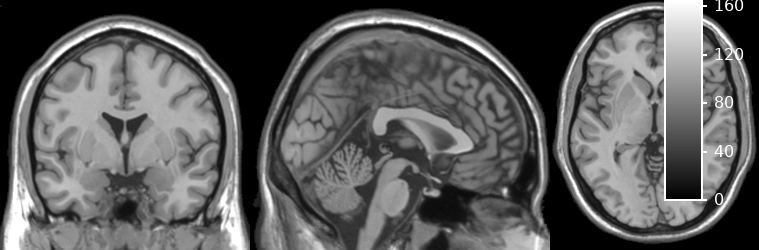

In [26]:
nii.get_image(height=250, cbar=True, cbar_y=.4)  # default: .5

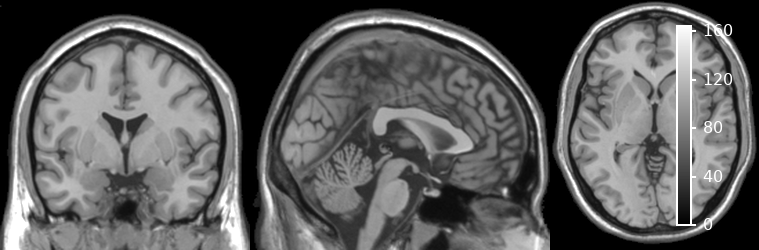

In [27]:
nii.get_image(height=250, cbar=True, cbar_width=.02)  # default: .05

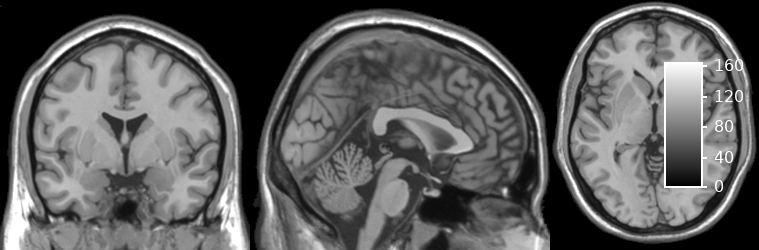

In [28]:
nii.get_image(height=250, cbar=True, cbar_length=.5)  # default: .8

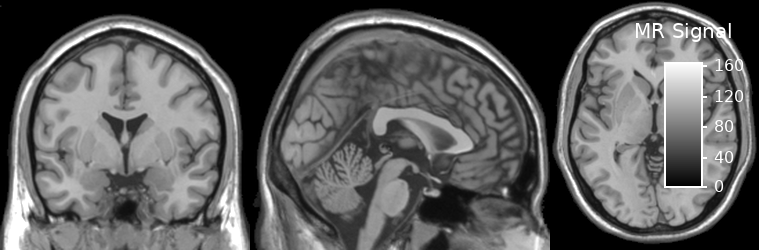

In [29]:
nii.get_image(height=250, cbar=True, cbar_label='MR Signal',  # default: None
              cbar_length=.5)

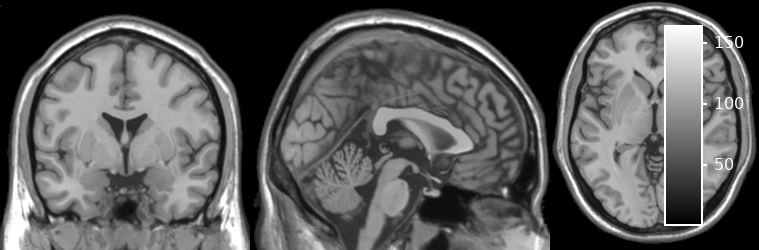

In [30]:
nii.get_image(height=250, cbar=True, cbar_ticks=[50, 100, 150])  # default: None

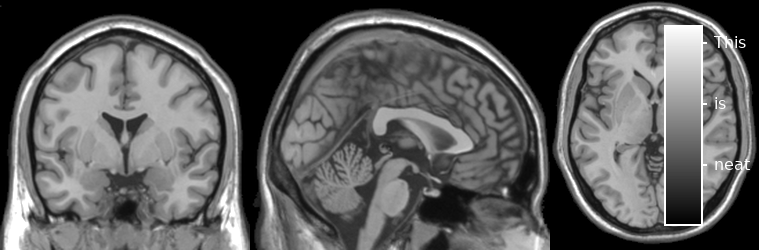

In [31]:
nii.get_image(height=250, cbar=True, cbar_ticks={50: 'neat', 100: 'is' , 150: 'This'})  # default: None

Let's make the lines and font unreasonably large, to show that we can

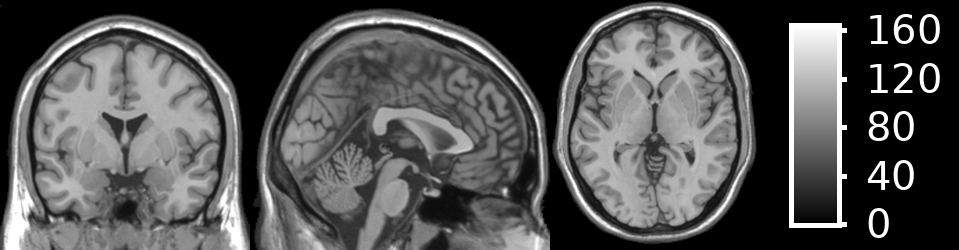

In [32]:
nii.get_image(height=250, cbar=True, linewidth=5, fontsize=50,
              cbar_pad=200, cbar_x=.85)  # to make some space 

And for our final trick let's change the linecolor and add transparency to the padding...

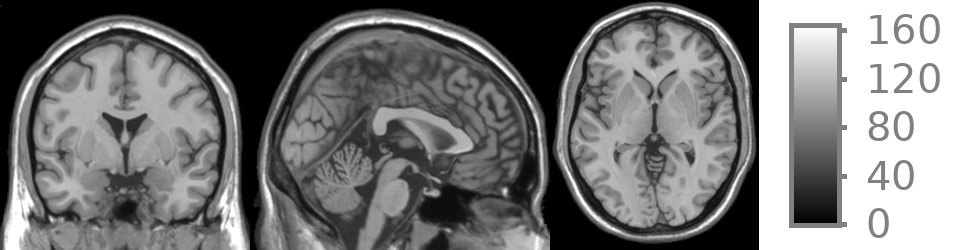

In [33]:
nii.get_image(height=250, cbar=True, linewidth=5, fontsize=50, linecolor='gray',
              cbar_pad=200, cbar_x=.85, cbar_pad_color='transparent')  # make pad transparent

...and to the image via `transp_if` 🪄

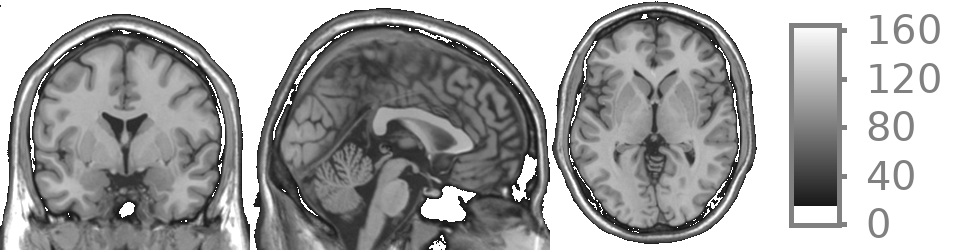

In [34]:
nii.get_image(height=250, cbar=True, linewidth=5, fontsize=50, linecolor='gray', transp_if=['<15.'],  # make image transparent
              cbar_pad=200, cbar_x=.85, cbar_pad_color='transparent')

## Multiplane Layout 🧩
Multiplane layouts can be easily created by combining a [custom layout](https://github.com/codingfisch/niftiview/blob/main/examples/0_core.ipynb) with `crosshair=True`

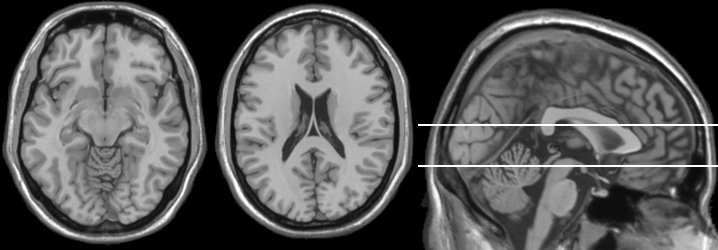

In [35]:
nii.get_image(height=250, layout='a[-10]|a[20]|s', crosshair=True)

## Histogram equalization ✨
Histogram equalization enhances the image contrast by distributing pixel values evenly across the value range

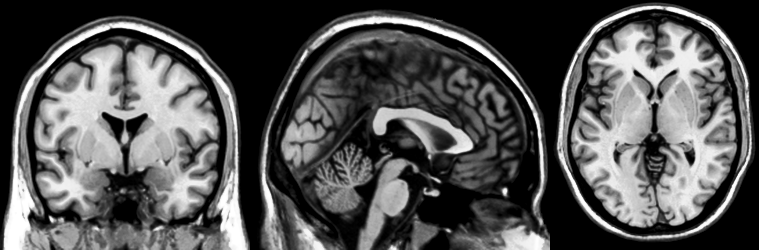

In [36]:
nii.get_image(height=250, qrange=(.5, .99), equal_hist=True)

## Passing `nibabel` image to `NiftiImage`
Via `NiftiImage(nib_images=...)`, `nibabel` images can be used instead of filepaths

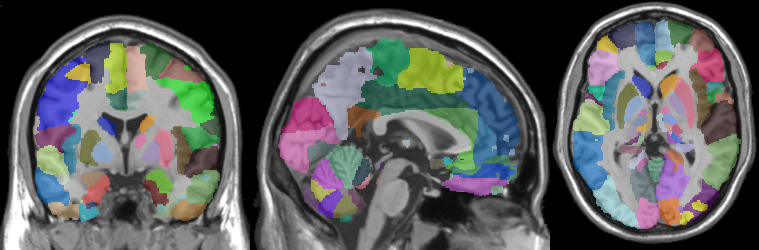

In [37]:
import nibabel as nib

img = nib.load(template_filepath)
mask = nib.load(atlas_filepath)
img = nib.as_closest_canonical(img)  # ensures proper orientation
mask = nib.as_closest_canonical(mask)  # ensures proper orientation

nii = NiftiImage(nib_images=(img, mask))
nii.get_image(height=250)

## Passing `numpy` array to `NiftiImage`
Via `NiftiImage(array=...)`, `numpy` arrays can be used instead of filepaths...

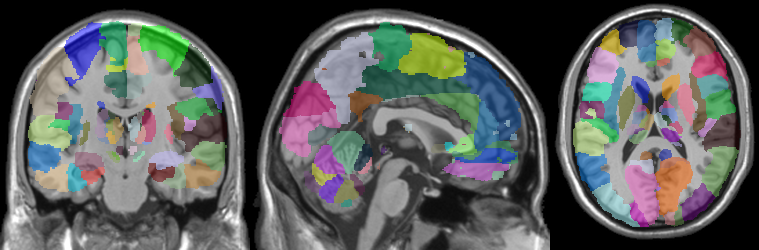

In [38]:
img_array = img.get_fdata()
mask_array = mask.get_fdata()

nii = NiftiImage(arrays=(img_array, mask_array))
nii.get_image(height=250)

...but it results in the mask not being aligned to the image. Therefore, `affines` should be passed along, if possible!

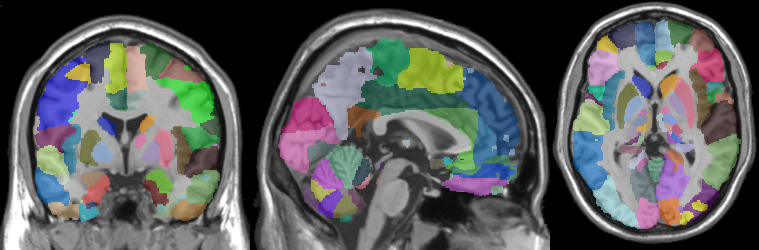

In [39]:
nii = NiftiImage(arrays=(img_array, mask_array), affines=(img.affine, mask.affine))
nii.get_image(height=250)

## Glassbrain 🔍
Using a brain schematic instead of the first image layer, `glass_mode='max'` projects the maximum value along the third dimension

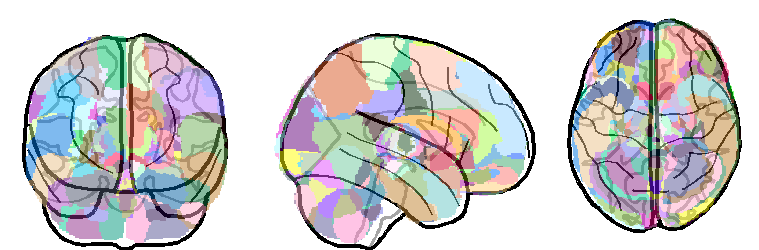

In [40]:
nii.get_image(height=250, glass_mode='max')  # 'max' 'absmax' or 'min'

## Speed 💨
`NiftiImage.get_image` only takes a few milliseconds. Check it out by running the cell below!

In [41]:
from tqdm import tqdm

nii = NiftiImage([TEMPLATES['ch2'], ATLASES['aal3']])
images = []
for i in tqdm(range(-80, 80)):
    origin = (i, 0, 0)  # moving across sagittal axis
    im = nii.get_image(origin=origin, height=250, layout='sagittal++', is_atlas=[False, True])
    images.append(im)

100%|██████████| 160/160 [00:00<00:00, 216.24it/s]


## Save GIF 📽️
`save_gif` takes a `NiftiImage` and saves it as a GIF by moving across an image axis (similar to the cell above)

In [42]:
from niftiview import save_gif

save_gif(nii, 'brain.gif', coordinates=True, layout='axial++')  # move across axial axis, since layout='axial++'